Result and Analysis

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch



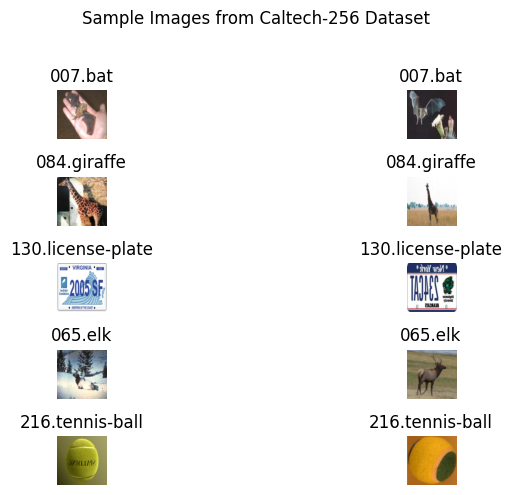

In [ ]:
# Directory where Caltech-256 dataset is stored
data_dir = './caltech256/256_ObjectCategories'

# Transformations (resize images for consistent display)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to a smaller size for visualization
    transforms.ToTensor()
])

# Load dataset
dataset = datasets.ImageFolder(data_dir, transform=transform)
class_names = dataset.classes  # Get class names

# Select a few random categories for display
num_categories = 5
images_per_category = 2
selected_classes = random.sample(class_names, num_categories)

fig, axes = plt.subplots(num_categories, images_per_category, figsize=(10, 5))
fig.suptitle("Sample Images from Caltech-256 Dataset")

for i, class_name in enumerate(selected_classes):
   
    class_index = class_names.index(class_name)
    class_indices = [idx for idx, (path, target) in enumerate(dataset.samples) if target == class_index]
    
    # Randomly select a few images from this category
    sample_indices = random.sample(class_indices, images_per_category)

    for j, idx in enumerate(sample_indices):
        image, label = dataset[idx]
        axes[i, j].imshow(image.permute(1, 2, 0)) 
        axes[i, j].axis('off')
        axes[i, j].set_title(class_name)

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


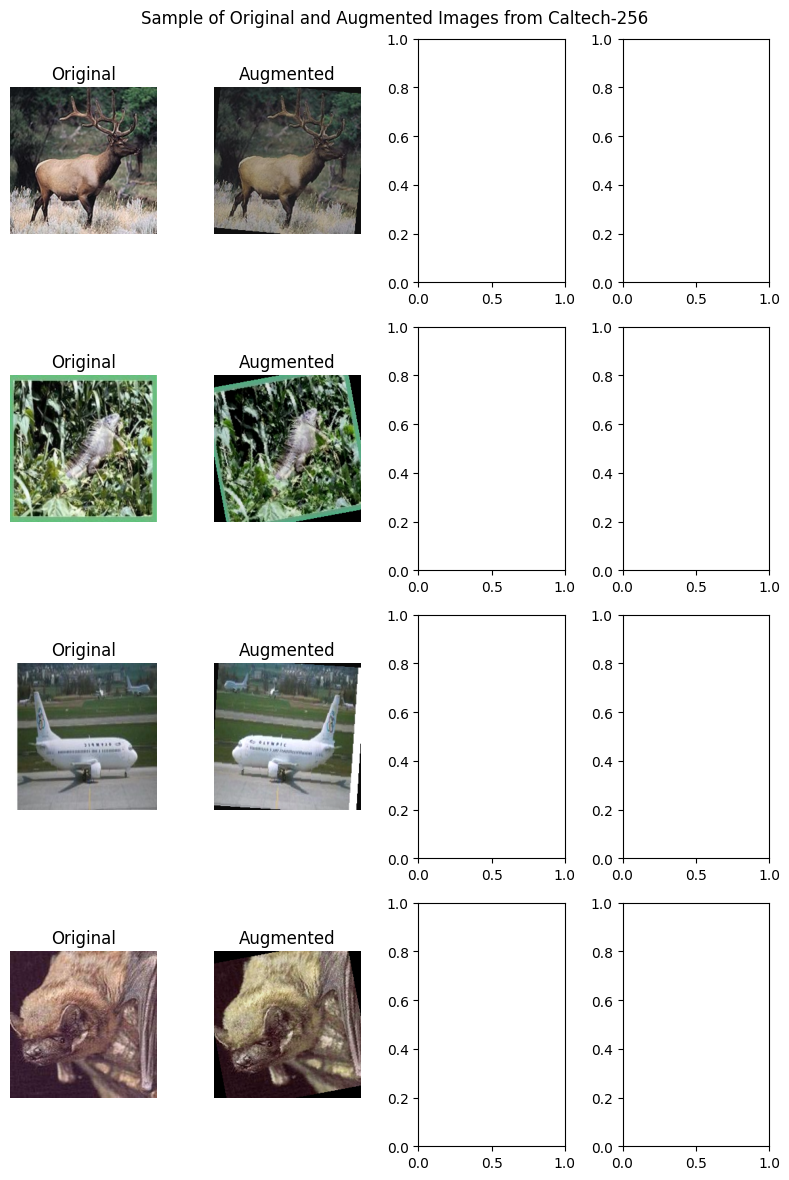

In [ ]:


data_dir = './caltech256/256_ObjectCategories'  

transform_original = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

transform_augmented = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor()
])

dataset_original = datasets.ImageFolder(data_dir, transform=transform_original)
dataset_augmented = datasets.ImageFolder(data_dir, transform=transform_augmented)

fig, axes = plt.subplots(2, 4, figsize=(16, 8)) 

for i in range(4):  
    idx = random.randint(0, len(dataset_original) - 1)
    original_image, _ = dataset_original[idx]
    augmented_image, _ = dataset_augmented[idx]
    
    axes[0, i].imshow(original_image.permute(1, 2, 0))
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')
    
    axes[1, i].imshow(augmented_image.permute(1, 2, 0))
    axes[1, i].set_title("Augmented")
    axes[1, i].axis('off')

plt.suptitle("Sample of Original and Augmented Images from Caltech-256")
plt.tight_layout()
plt.show()


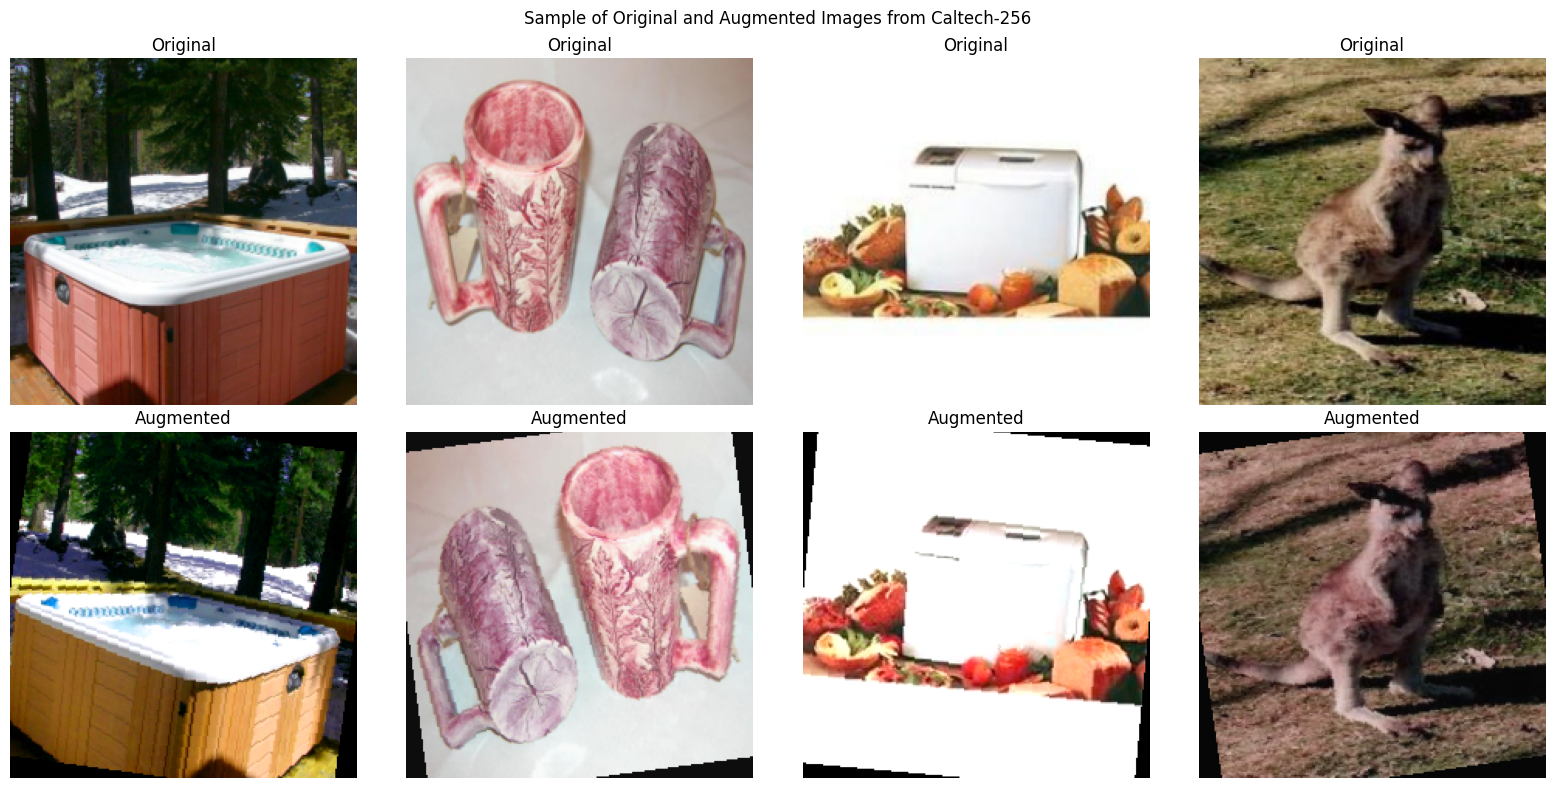

In [ ]:
data_dir = './caltech256/256_ObjectCategories' 

transform_original = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

transform_augmented = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor()
])

dataset_original = datasets.ImageFolder(data_dir, transform=transform_original)
dataset_augmented = datasets.ImageFolder(data_dir, transform=transform_augmented)

fig, axes = plt.subplots(2, 4, figsize=(16, 8)) 

for i in range(4): 
    idx = random.randint(0, len(dataset_original) - 1)
    original_image, _ = dataset_original[idx]
    augmented_image, _ = dataset_augmented[idx]
    
    axes[0, i].imshow(original_image.permute(1, 2, 0))
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')
    
    axes[1, i].imshow(augmented_image.permute(1, 2, 0))
    axes[1, i].set_title("Augmented")
    axes[1, i].axis('off')

plt.suptitle("Sample of Original and Augmented Images from Caltech-256")
plt.tight_layout()
plt.show()


In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = './caltech256/256_ObjectCategories' 

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(data_dir, transform=data_transforms)

class_names = dataset.classes
num_classes = len(class_names)
print(f'Number of classes: {num_classes}')


Number of classes: 257
